In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras. utils.vis_utils import plot_model
import matplotlib.pyplot as plt


In [38]:
df_amd=pd.read_csv("data/AMD (1980-2023).csv",index_col="Date",parse_dates=True,infer_datetime_format=True)
df_asus=pd.read_csv("data/ASUS (2000-2023).csv",index_col="Date",parse_dates=True,infer_datetime_format=True)
df_intel=pd.read_csv("data/Intel (1980-2023).csv",index_col="Date",parse_dates=True,infer_datetime_format=True)
df_msi=pd.read_csv("data/MSI (1962-2023).csv",index_col="Date",parse_dates=True,infer_datetime_format=True)
df_nvidia=pd.read_csv("data/NVIDIA (1999-2023).csv",index_col="Date",parse_dates=True,infer_datetime_format=True)
df_amd

C:\Users\ahmed\AppData\Local\Temp\ipykernel_544\1097250864.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_amd=pd.read_csv("data/AMD (1980-2023).csv",index_col="Date",parse_dates=True,infer_datetime_format=True)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_544\1097250864.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_asus=pd.read_csv("data/ASUS (2000-2023).csv",index_col="Date",parse_dates=True,infer_datetime_format=True)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_544\1097250864.py:3: FutureWarning: The argument 'infer_datetime_format' i

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-18,0.000000,3.125000,2.937500,3.031250,3.031250,727200
1980-03-19,0.000000,3.083333,3.020833,3.041667,3.041667,295200
1980-03-20,0.000000,3.062500,3.010417,3.010417,3.010417,159600
1980-03-21,0.000000,3.020833,2.906250,2.916667,2.916667,130800
1980-03-24,0.000000,2.916667,2.635417,2.666667,2.666667,436800
...,...,...,...,...,...,...
2023-04-05,94.349998,94.500000,91.360001,92.559998,92.559998,52979300
2023-04-06,91.470001,92.910004,90.620003,92.470001,92.470001,47778400
2023-04-10,91.320000,95.800003,91.019997,95.480003,95.480003,52536300


In [39]:
df_amd.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Plotting the target variable (Adjusted Closing)

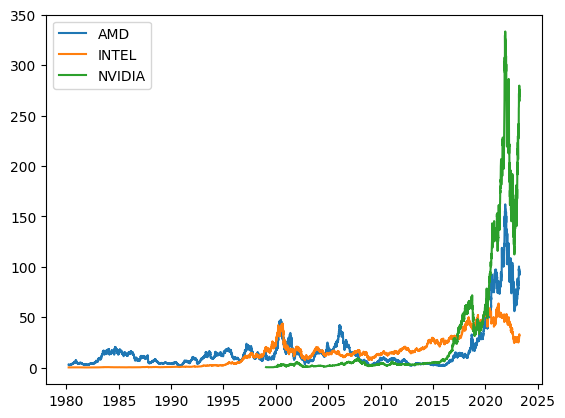

In [54]:
plt.plot(df_amd["Adj Close"],label="AMD")
plt.plot(df_intel["Adj Close"],label="INTEL")
plt.plot(df_nvidia["Adj Close"],label="NVIDIA")
plt.legend()
plt.show()

In [41]:
output_var=pd.DataFrame(df_amd["Adj Close"])
features=["Open","High","Volume","Low"]

In [42]:
scaler=MinMaxScaler()
transformed_features=scaler.fit_transform(df_amd[features])
transformed_features=pd.DataFrame(columns=features,data=transformed_features,index=df_amd.index)
transformed_features

,Open,High,Volume,Low
Date,,,,
1980-03-18,0.000000,0.008816,0.002237,0.008593
1980-03-19,0.000000,0.008560,0.000908,0.009132
1980-03-20,0.000000,0.008432,0.000491,0.009065
1980-03-21,0.000000,0.008176,0.000402,0.008391
1980-03-24,0.000000,0.007536,0.001344,0.006637
...,...,...,...,...
2023-04-05,0.577842,0.570191,0.162984,0.580944
2023-04-06,0.560203,0.560423,0.146984,0.576154
2023-04-10,0.559285,0.578178,0.161621,0.578743


In [70]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(transformed_features):
        X_train, X_test = transformed_features[:len(train_index)], transformed_features[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [71]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
trainX.shape

(9872, 4)

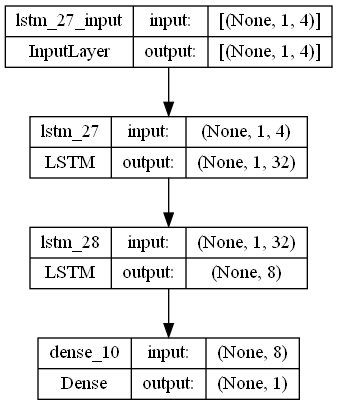

In [89]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu' ,return_sequences=True))

lstm.add(LSTM(8, input_shape=(1, trainX.shape[1]), activation='relu' ))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [90]:
history=lstm.fit(X_train,y_train,epochs=5,batch_size=5,verbose=1,shuffle=False)

Epoch 1/5
1975/1975 [==============================] - 5s 2ms/step - loss: 25.6875
Epoch 2/5
1975/1975 [==============================] - 3s 2ms/step - loss: 3.6788
Epoch 3/5
1975/1975 [==============================] - 3s 2ms/step - loss: 0.9497
Epoch 4/5
1975/1975 [==============================] - 3s 2ms/step - loss: 0.4611
Epoch 5/5
1975/1975 [==============================] - 3s 2ms/step - loss: 0.3488


In [91]:
y_pred= lstm.predict(X_test)


31/31 [==============================] - 0s 964us/step


In [92]:
lstm.evaluate(X_test,y_test)

31/31 [==============================] - 0s 851us/step - loss: 28.3716


28.371639251708984

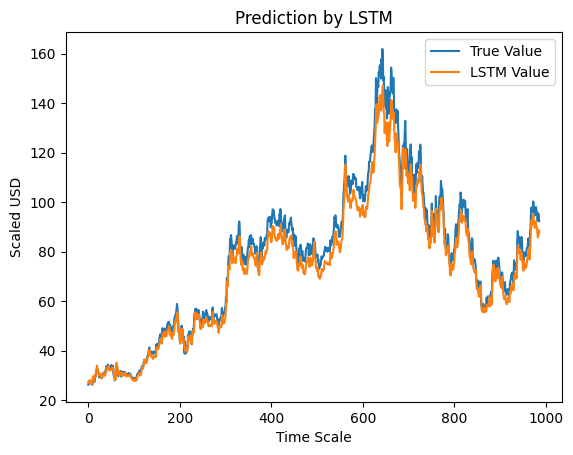

In [93]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()